In [95]:
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt

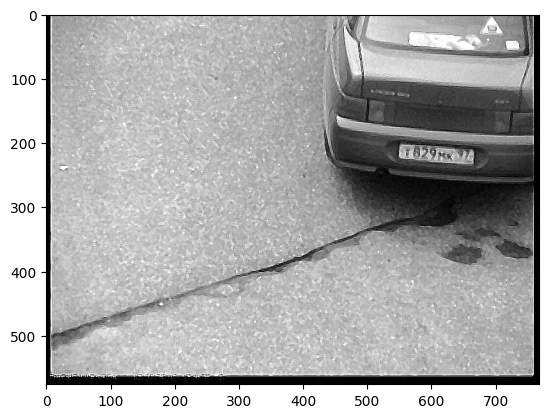

In [96]:
image = cv.imread("..\\img\\01-393.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blur = cv.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv.filter2D(blur, -1, sharpen_kernel)

plt.imshow(sharpen, cmap="gray")

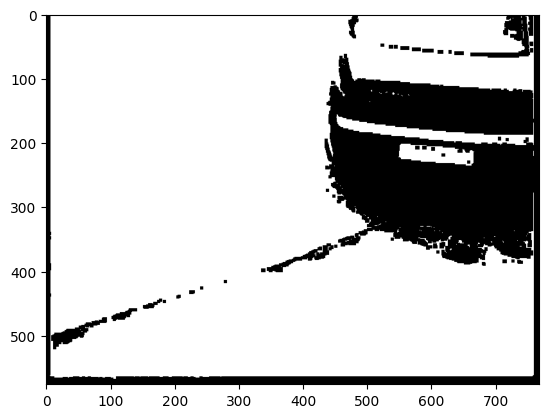

In [97]:
thresh = cv2.threshold(sharpen, 150, 255, cv2.THRESH_BINARY)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(close, cmap="gray")

In [101]:
def sign(name):
    image = cv.imread(name)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)

    thresh = cv2.threshold(sharpen, 150, 255, cv2.THRESH_BINARY)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    cnts = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    # cv.drawContours(image, cnts, -1, (0,255,0), 3)

    min_area = 2000
    max_area = 3100
    image_number = 0
    for c in cnts:
        area = cv2.contourArea(c)
        if min_area < area < max_area:
            x,y,w,h = cv2.boundingRect(c)
            coef = w * h / area
            if coef < 1.8:

            # ROI = image[y:y+h, x:x+w]
            # cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
                cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
                image_number += 1

    # cv2.imshow('sharpen', sharpen)
    # cv2.imshow('close', close)
    # cv2.imshow('thresh', thresh)
    cv2.imshow(f'image {name}', image)
    cv2.waitKey()

sign("..\\img\\01-393.jpg")
sign("..\\img\\01-541.jpg")
sign("..\\img\\01-715.jpg")

